In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('Data/Absenteeism_at_work.csv', sep = ';')
print(data.columns)
data

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


## Column Wise Analysis

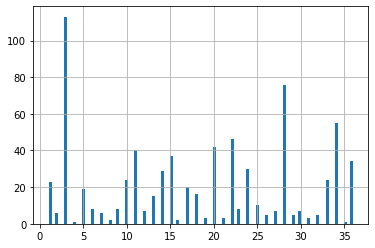

In [3]:
plt.figure()
data['ID'].hist(bins = 100)
plt.show()

There are 36 unique individuals in this data who have taken leaves for various reasons

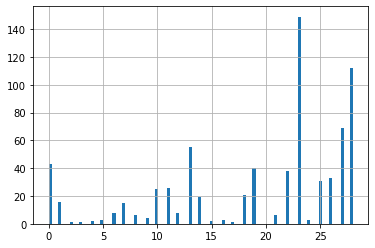

In [82]:
plt.figure()
data['Reason for absence'].hist(bins = 100)
plt.show()

Medical and dental consultation along with therapy seems to be the major reason for absence for these employees, although diseases of musculoskeletal system and connective tissue seems to also be pretty high. Probably should check if this problem is there only with old people or not. Try including drinkers in that category too? Again a few other common occurences include infectious diseases, Injury, poisoning and patient follow up.

As for the Injury and poisoning, we should probably check whether longer travel time leads to higher chances of injury or if being a social smoker or drinker can cause poisoning of some kind (Maybe even see if pets cause this issue?)

Should also check for a direct correlation between social smokers and respiratory diseases.

Age vs disease correlation for all diseases

Unjustifed absence vs day of week, month other reasons

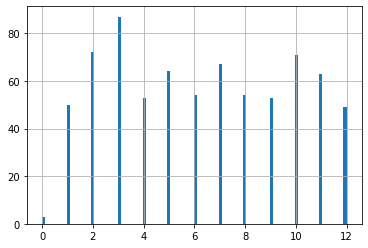

In [83]:
plt.figure()
data['Month of absence'].hist(bins = 100)
plt.show()

More or less balanced. Some entries are filled with 0, must investigate what that is. Maybe just some error in typing 10 or 1 but is surely possible that for some reason the month wasn't recorded. 

Also one thing to check here is do the social drinkers, who generally tend to drink more in the colder months of April-July, since Brazil is in the southern hemisphere, have more health related leaves during this time.

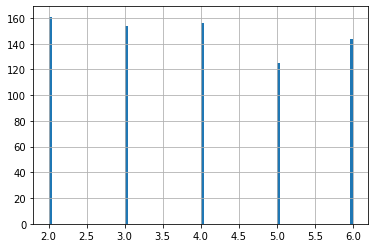

In [84]:
plt.figure()
data['Day of the week'].hist(bins = 100)
plt.show()

Saturdays Sundays are off days and the distribution here is more or less evenly balanced. Should see why Thursdays see a dip in the number of leaves (still need to figure out how).

Should also search for instances where people took Friday and Monday off continuously to convert to a long weekend and whether or not it was centred around a public holiday. Which leads me to one more thing, we should check if some of the unjustified absences are just a day before/after public holidays

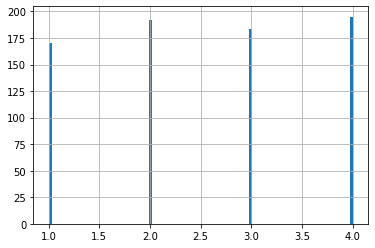

In [85]:
plt.figure()
data['Seasons'].hist(bins = 100)
plt.show()

Again pretty much nothing to say here, seasons are well balanced. Just want to test out the earlier "drinker takes more leaves in winter" theory

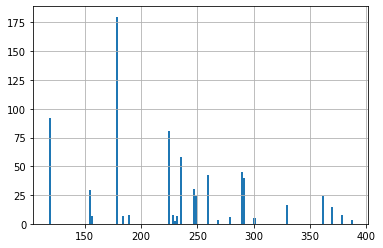

In [86]:
plt.figure()
data['Transportation expense'].hist(bins = 150)
plt.show()

Very uneven distribution. Should probably first group this down to a class of employees(like high or mid or low absenteeism) and check this distribution for each of them. Should give a better idea if it has some better trend. Can't make out anything from here

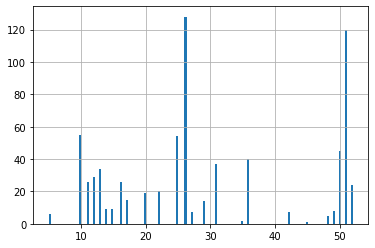

In [87]:
plt.figure()
data['Distance from Residence to Work'].hist(bins = 150)
plt.show()

Probably constant for each employee, should see if there is a change for a single employee, which will imply a change of residence in these three years which we can use to see if they had more leaves before the change or after the change or if any of it was centred around the change since everything needed to be moved from one house to another.

CHECKED - On examining with Excel, it turns out that this is constant for particular employee over time

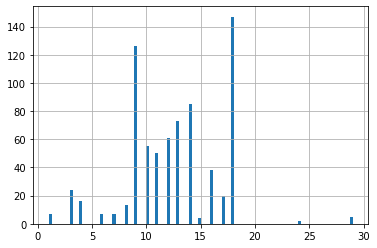

In [88]:
plt.figure()
data['Service time'].hist(bins = 100)
plt.show()

This is probably the service time in years, could use this to see if a person had more leaves in 2007-08, 08-09 or 09-10.

CHECKED - On examining with Excel, it turns out that this is constant for particular employee over time

Also should search for any major event which happened in Brazil during these years to see if there could be any reason for a person having more leaves (maybe some epidemic or natural calamity or something)

TO CHECK - Leaves wrt time

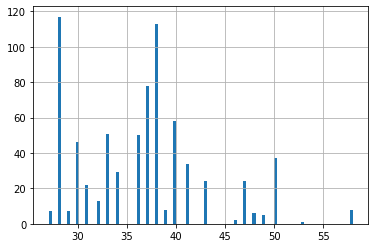

In [89]:
plt.figure()
data['Age'].hist(bins = 100)
plt.show()

More youngsters than old-timers who have leaves. Should definitely look into why this is happening. Could be multiple reasons. Maybe they have a higher workload which is causing more stress or maybe they have a lesser workload which means they have nothing to do on a few days. Or in general lifestyle choices are causing them to fall sick more often. Should look into all these reasons.

TO CHECK - Workload vs age, number of people vs age

That being said, something which just popped into my mind, I noticed that there are really less number of instances of people who took leaves for Pregnancy and childbirth and stuff. Should definitely check how much such people are there and we could work towards figuring out the gender ratio when it comes to taking leaves. 

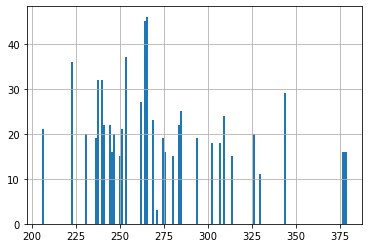

In [90]:
plt.figure()
data['Work load Average/day '].hist(bins = 150)
plt.show()

There is a trend to this distribution but I see some instances of people with a really high workload. Should check if the workload increases over time for any given individual and if increasing workload leads to more absenteeism or if it reduces it

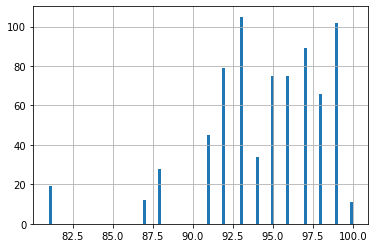

In [91]:
plt.figure()
data['Hit target'].hist(bins = 100)
plt.show()

In general there are more instances where people have met their targets. Since the time interval for meeting and resetting these targets is not specified, we can assume that these are actually weekly targets because that's the only number which looks respectable. Meeting 90 monthly targets in 3 years is not possible and 90 daily targets in 3 years makes it look like the courier company is underperforming like crazy.

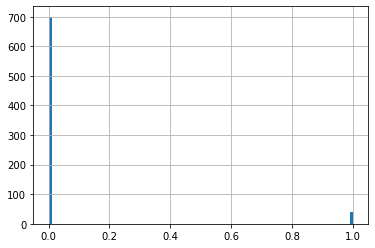

In [92]:
plt.figure()
data['Disciplinary failure'].hist(bins = 100)
plt.show()

Should check how many people have disciplinary failure and whether or not it is associated with them being a social drinker, smoker or with more diseases or anything of the sort

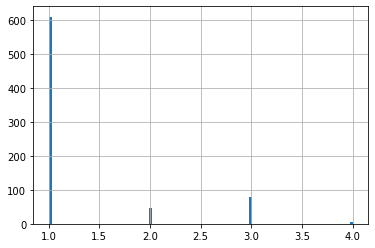

In [93]:
plt.figure()
data['Education'].hist(bins = 100)
plt.show()

More number of high school graduates have been employed here and this gets me to think of one thing. Is it more of a survival thing for these people and do people with a lot of education prefer not to work in this sector? Or is it only that the ones with more education tend to take lesser leaves? Well idk how we can figure that out from this data but will surely try to see if it's possible

> It's a courier company so some of their employees would be the actual delivery guys, who may not have much education

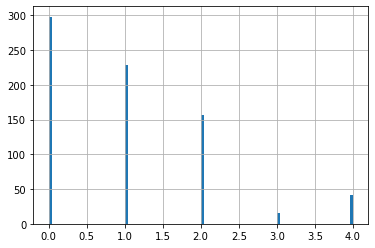

In [94]:
plt.figure()
data['Son'].hist(bins = 100)
plt.show()

Shows that with an increasing number of sons, in general, people take lesser leaves since they wan to earn and be able to provide for their families. But this trend stops at 3 sons after which the employee also needs to go and take care of their child since looking after all of them and handling the job will be hard.

> We need to normalise here. There are prolly just more employees with 1 kid, so even if thye take less leave, their numbers add up to give that bin height.

Should try to see if there is an increase/decrease in the number of targets hit or increase/decrease in workload as the number of sons increase

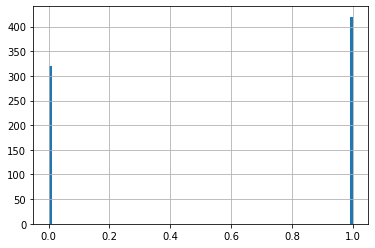

In [95]:
plt.figure()
data['Social drinker'].hist(bins = 100)
plt.show()

This column shows that a good deal of the employees are social drinkers and is going to be extensively used to check a lot of hypothesis made earlier

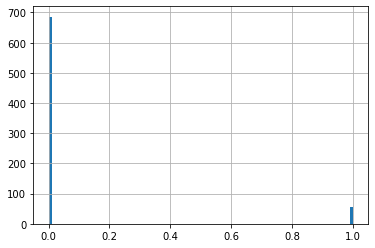

In [96]:
plt.figure()
data['Social smoker'].hist(bins = 100)
plt.show()

Not a lot of instances where a social smoker has taken leaves, but still should give a check to see in general do these people belong to the high, mid or low absenteeism class

Can also check if these people have higher/lower targets met or not

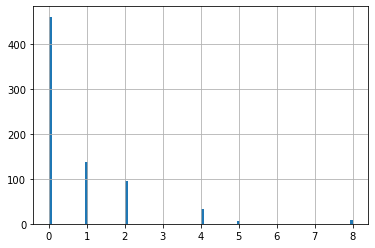

In [97]:
plt.figure()
data['Pet'].hist(bins = 100)
plt.show()

There are more instances of people without pets who take leaves, but we should check if having a pet causes an individual to take more frequent leaves.

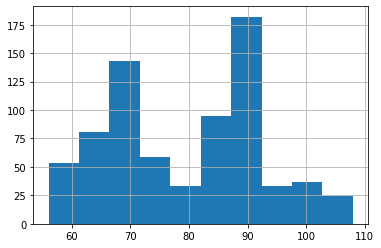

In [11]:
plt.figure()
data['Weight'].hist(bins = 10)
plt.show()

Slight trend to the weights distributions, should check if a persons weight increases over time and if this is related with that person taking more leaves for medical reasons or if being a social drinker causes the increase in weight

> We need to normalise here also

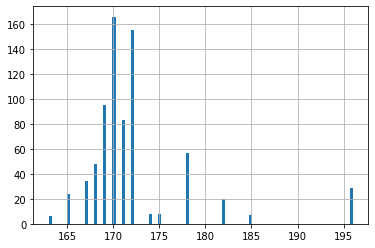

In [99]:
plt.figure()
data['Height'].hist(bins = 100)
plt.show()

A lot of people have the same height range, should check for changes in an individuals height and what their age is, accordingly we can make some inferences

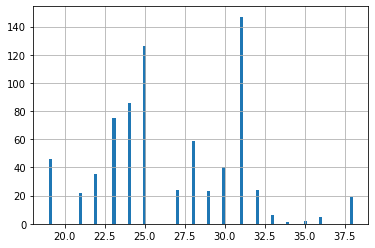

In [100]:
plt.figure()
data['Body mass index'].hist(bins = 100)
plt.show()

This column can be used to check if people with a BMI which leads them to being called "Fit" have better chances of taking on a higher worklaod and meeting their targets. At the same time if high BMI causes a person to become lazy/take more leaves for medical reasons more often

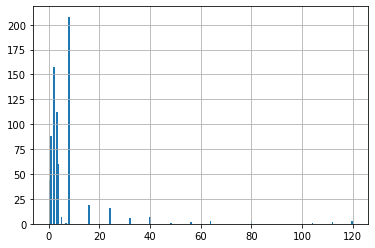

In [101]:
plt.figure()
data['Absenteeism time in hours'].hist(bins = 200)
plt.show()

How is absenteeism time more than 24 hours? Is it a cumulative score? Or is there some other reason behind a person having more absenteeism time

## Getting Data Ready for further analysis

In [102]:
ID_Group = data.groupby(['ID'])
ID_Group.first()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8
2,18,8,5,1,235,29,12,48,205.917,92,0,1,1,0,1,5,88,163,33,8
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
5,19,9,3,1,235,20,13,43,241.476,92,0,1,1,1,0,0,106,167,38,8
6,11,7,5,1,189,29,13,33,239.554,97,0,1,2,0,0,2,69,167,25,8
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
8,0,9,3,1,231,35,14,39,294.217,81,1,1,2,1,0,2,100,170,35,0
9,18,8,3,1,228,14,16,58,265.615,94,0,1,2,0,0,1,65,172,22,8


In [103]:
num_absent = ID_Group.size()
num_absent

ID
1      23
2       6
3     113
4       1
5      19
6       8
7       6
8       2
9       8
10     24
11     40
12      7
13     15
14     29
15     37
16      2
17     20
18     16
19      3
20     42
21      3
22     46
23      8
24     30
25     10
26      5
27      7
28     76
29      5
30      7
31      3
32      5
33     24
34     55
35      1
36     34
dtype: int64

In [104]:
ID_separated = []

for i in range(36):
    ID_separated.append(ID_Group.get_group(i+1))

len(ID_separated)

36

In [105]:
ID_separated[0].head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
9,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8
32,23,8,5,1,235,11,14,37,205.917,92,0,3,1,0,0,1,88,172,29,4
101,26,12,4,4,235,11,14,37,261.306,97,0,3,1,0,0,1,88,172,29,8
202,7,4,6,3,235,11,14,37,326.452,96,0,3,1,0,0,1,88,172,29,3
229,13,6,6,3,235,11,14,37,377.550,94,0,3,1,0,0,1,88,172,29,16


In [106]:
low_absent = pd.DataFrame()
mid_absent = pd.DataFrame()
high_absent = pd.DataFrame()

for i in range(len(data)):
    ID = data.iloc[i,0]
    absent = num_absent[ID]
    if absent < 25:
        low_absent = low_absent.append(data.iloc[i,:])
    elif absent<50:
        mid_absent = mid_absent.append(data.iloc[i,:])
    else:
        high_absent = high_absent.append(data.iloc[i,:])

print(len(low_absent), len(mid_absent), len(high_absent))

238 258 244


# More analysis

### Checking the age of people with musculoskeletal system and connective tissue diseases

In [107]:
data[data['Reason for absence'] == 13].groupby(['Age', 'Social drinker']).size()

Age  Social drinker
28   0                  5
     1                  1
30   0                 10
31   1                  1
33   0                  1
     1                  4
34   1                  2
36   1                  3
37   0                  4
38   1                 10
40   1                  1
41   1                  3
43   1                  3
47   0                  1
50   1                  6
dtype: int64

From this one thing becomes clear, as age increases, typically for people who cross the age of 30, the chances of a social drinker developing diseases related to musculoskeletal system and connective tissue is 5.5 times that of a non social drinker

### Checking if longer travel leads to more injury

In [108]:
data[data['Reason for absence'] == 19].groupby(['Distance from Residence to Work']).size()

Distance from Residence to Work
10    4
11    1
12    2
13    2
15    1
20    1
25    4
26    4
27    2
29    1
36    8
49    1
50    4
51    3
52    2
dtype: int64

## Observation 1

There are 25 instances of people taking leave for injury and poisoning where the distance of travel from home is more than 25 kms as opposed to 15 instances where people took leave for this reason when their travel from their home to work was less than 25kms. This isn't good enough to make some common conclusion since we don't know whether this was taken exactly for an injury or for poisoning

> 

### Checking who are the people who took leaves for respiratory diseases (smokers or not)

In [109]:
data[data['Reason for absence'] == 10].groupby(['Social smoker']).size()

Social smoker
0    24
1     1
dtype: int64

Looks like my theory is not supported here

> Normalise with number of people - we currently counted the number of separate leave instances

But then again the number of social smokers is severely underrepresented. Maybe I should try upsampling with smote once and then check this again for a better estimate?

In [110]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X = data.drop(['Social smoker'], axis = 1)
y = data['Social smoker']

X_smoke, y_smoke = sm.fit_resample(X,y)

smoker = pd.concat([X_smoke,y_smoke], axis = 1)
smoker[smoker['Reason for absence'] == 9].groupby(['Social smoker']).size()

Social smoker
0     4
1    25
dtype: int64

Well the respiratory diseases thing goes for a toss but if we upsample and do this then we see that even if we change the random state to any number(something which I tried and tested for almost 50 random states), the number of social smokers who have taken leaves for diseases related to the circulatory system is really high. Idk if this counts as a legit experiment or something from which I can draw good enough conclusions from or not

> I think its not, cos as you said the social smokers are damn underrepresented. So SMOTE has like 2-3 datapoints to go with and it will average around there only. Ig im kinda getting what pawar said

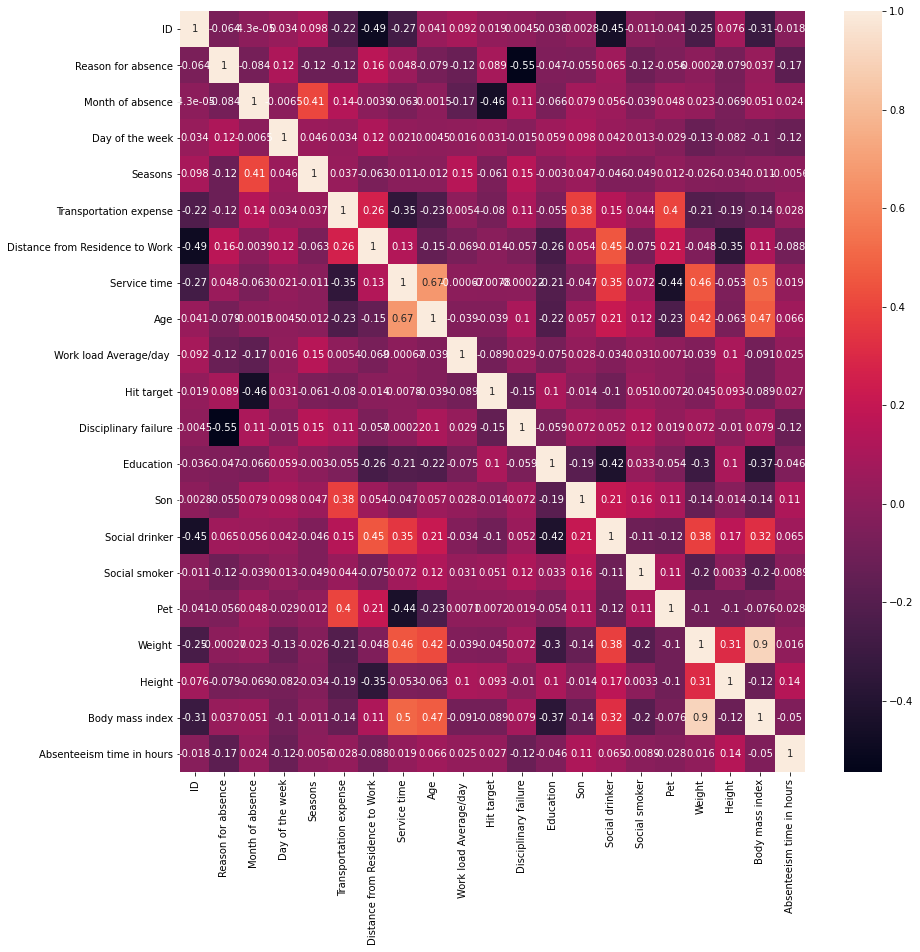

In [111]:
plt.figure(figsize = (14,14))
sns.heatmap(data.corr(), annot = True)
plt.show()

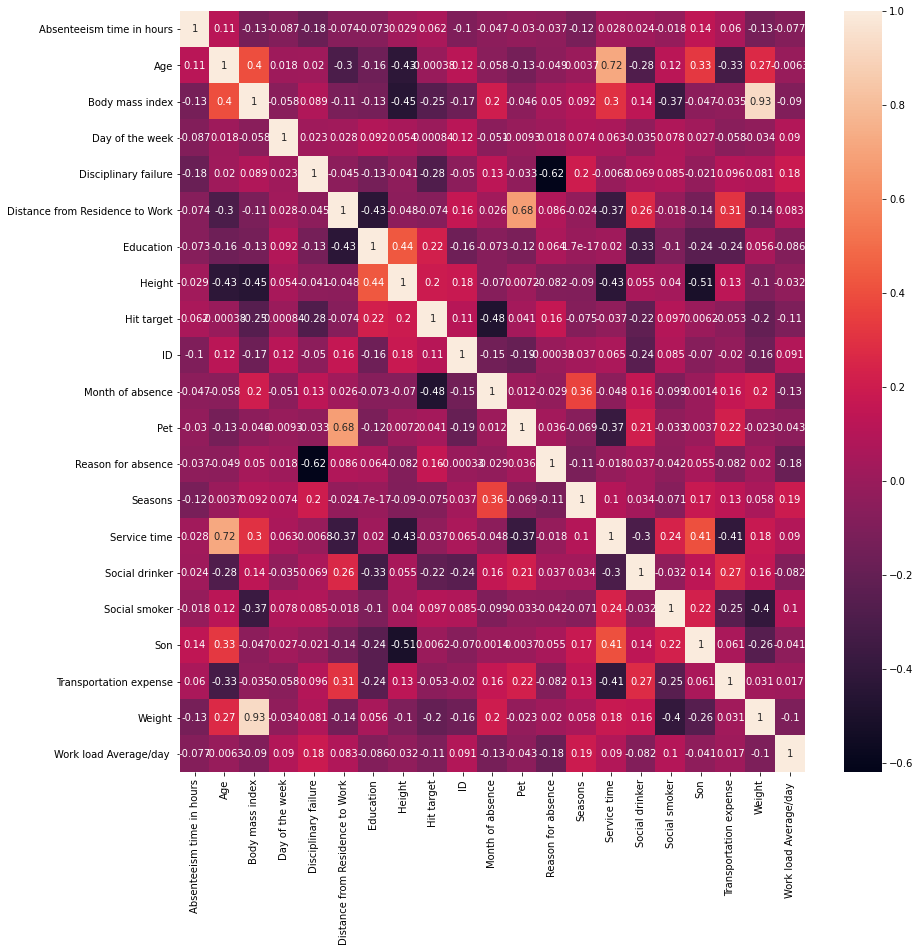

In [112]:
plt.figure(figsize = (14,14))
sns.heatmap(low_absent.corr(), annot = True)
plt.show()

In [113]:
mid_absent.groupby(['ID']).size()

ID
11.0    40
14.0    29
15.0    37
20.0    42
22.0    46
24.0    30
36.0    34
dtype: int64

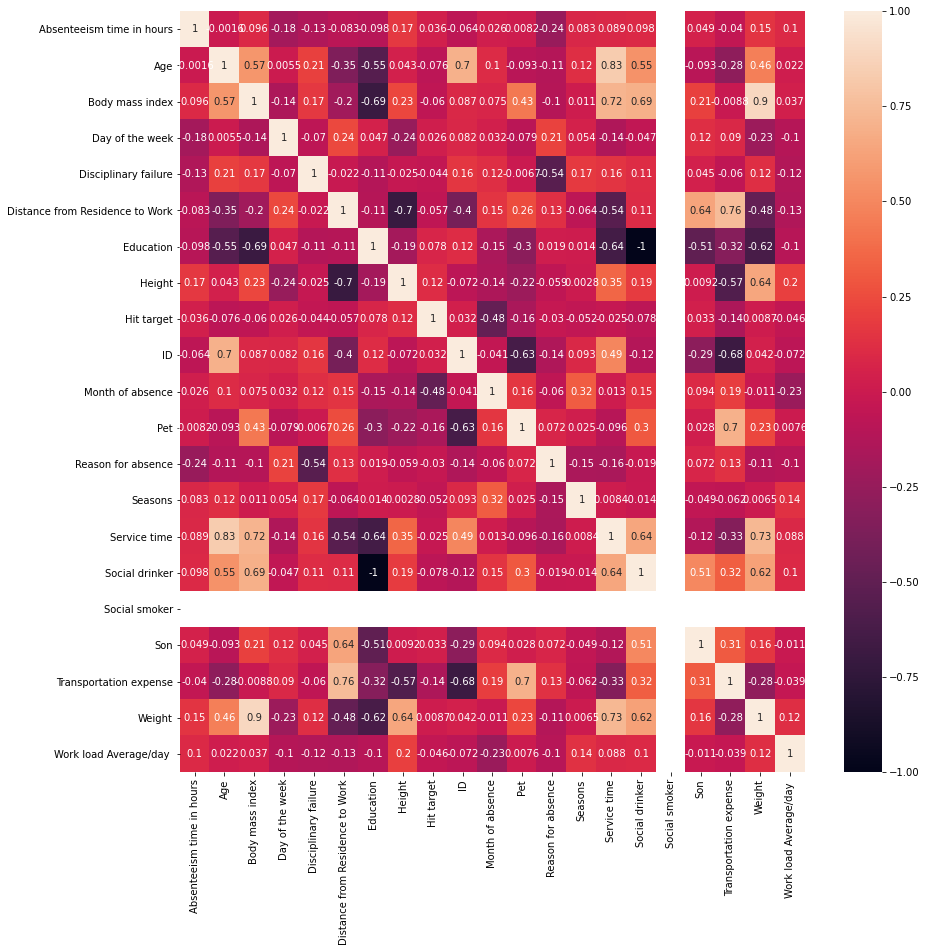

In [114]:
plt.figure(figsize = (14,14))
sns.heatmap(mid_absent.corr(),annot = True)
plt.show()

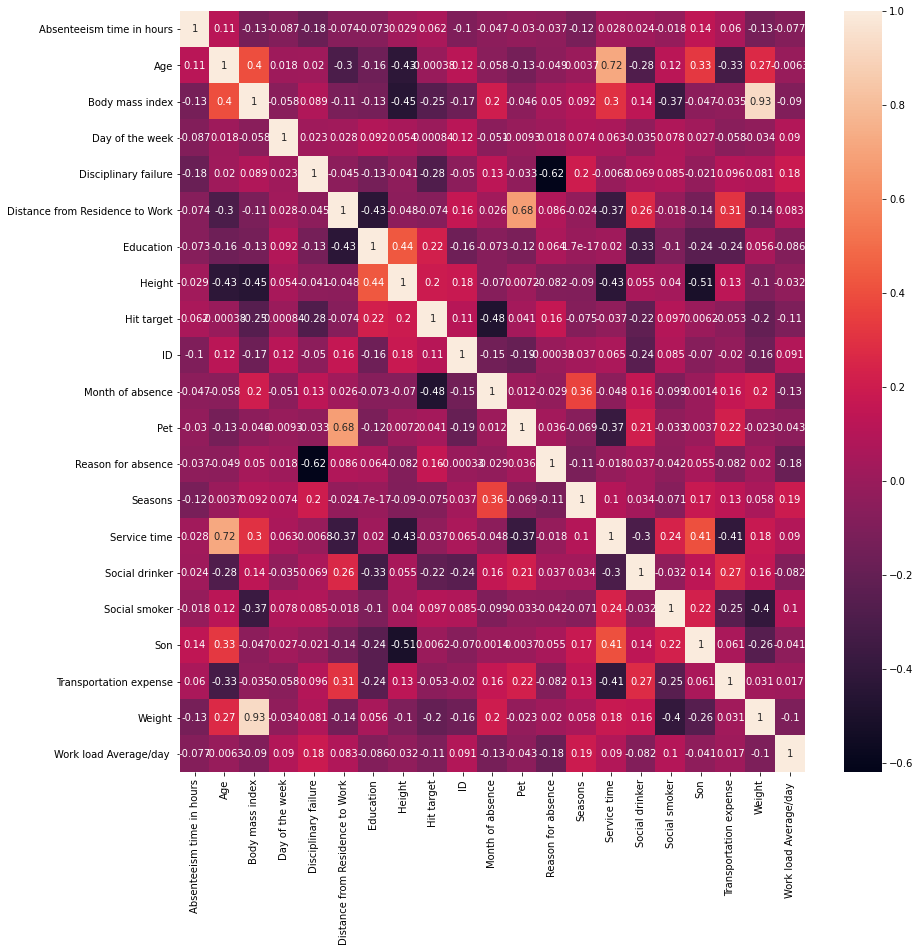

In [115]:
plt.figure(figsize = (14,14))
sns.heatmap(low_absent.corr(),annot = True)
plt.show()

Okay these column names are getting too annoying to work with

In [116]:
data.rename(columns={'Reason for absence': 'Reason',
                  'Month of absence': 'Month',
                  'Day of the week': 'Weekday',
                   'Seasons': 'Season',
                   'Disciplinary failure': 'Failure',
                  'Transportation expense': 'Expense',
                  'Distance from Residence to Work': 'Distance',
                  'Service time': 'ServiceTime',
                  'Work load Average/day ': 'Workload',
                   'Hit target': 'HitTarget',
                   'Son': 'Child',
                  'Social drinker': 'Drinker',
                  'Social smoker': 'Smoker',
                  'Body mass index': 'BMI',
                  'Absenteeism time in hours': 'AbsH'}, 
          inplace = True)

In [117]:
data.loc[(data['Education'] == 1),'Edu_Text'] = 'High school'
data.loc[(data['Education'] == 2),'Edu_Text'] = 'Graduate'
data.loc[(data['Education'] == 3),'Edu_Text'] = 'Postgraduate'
data.loc[(data['Education'] == 4),'Edu_Text'] = 'Master and doctor'

In [118]:
data['Month'] = data['Month'].astype('category')
data['Weekday'] = data['Weekday'].astype('category')
data['Reason'] = data['Reason'].astype('category')
data['Failure'] = data['Failure'].astype('category')
data['Season'] = data['Season'].astype('category')
data['Education'] = data['Education'].astype('category')
data['Edu_Text'] = data['Edu_Text'].astype('category')
data['Drinker'] = data['Drinker'].astype('category')
data['Smoker'] = data['Smoker'].astype('category')

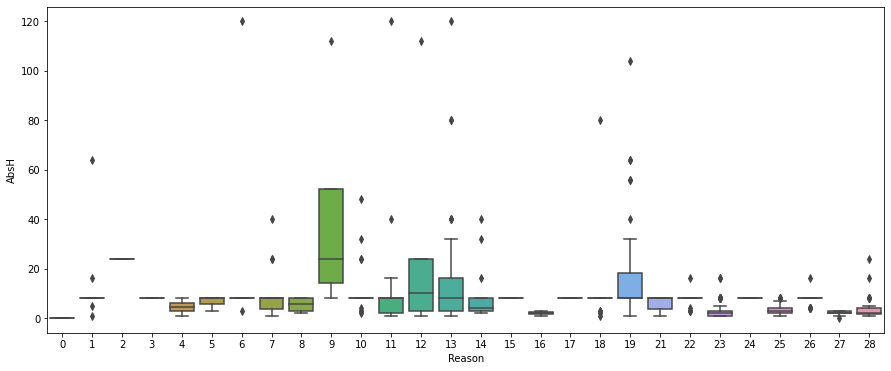

In [119]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = data['Reason'], y = data['AbsH'])
plt.show()

## Observation 2
Whenever a person takes leave for reason 9 or 12, they tend to take leave for a longer period of time

In [120]:
data[data['Month'] == 0][['ID','Month', 'Weekday','Reason', 'AbsH']]

,ID,Month,Weekday,Reason,AbsH
737,4,0,3,0,0
738,8,0,4,0,0
739,35,0,6,0,0


In [121]:
data[data['AbsH'] == 0][['ID','Month', 'Weekday','Reason', 'AbsH']]

,ID,Month,Weekday,Reason,AbsH
1,36,7,3,0,0
50,20,9,2,0,0
51,29,9,2,0,0
54,11,9,3,0,0
55,36,9,3,0,0
58,13,9,4,0,0
64,36,10,4,0,0
134,34,1,2,27,0
203,2,4,2,0,0
213,7,5,4,0,0


In [122]:
hours_absent = ID_Group.sum()['Absenteeism time in hours']
hours_absent

ID
1     121
2      25
3     482
4       0
5     104
6      72
7      30
8       0
9     262
10    186
11    450
12     34
13    183
14    476
15    253
16     16
17    126
18    118
19      6
20    306
21     16
22    253
23     40
24    254
25     42
26     83
27     27
28    347
29     21
30     31
31     16
32     16
33     73
34    344
35      0
36    311
Name: Absenteeism time in hours, dtype: int64

## Observation 3

From the above info we can see that Employees with ID 4,8,35 have not taken any leave at all

/home/aryan/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/aryan/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


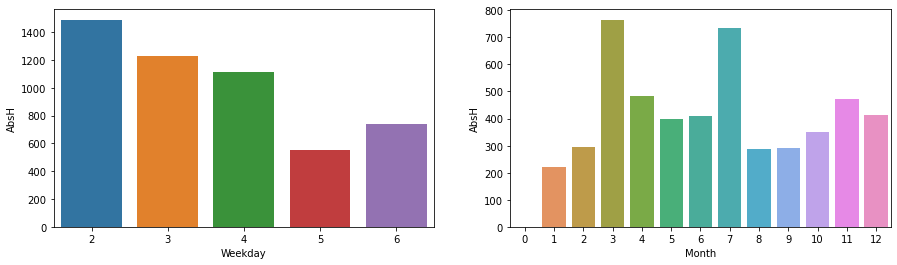

In [123]:
plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
sns.barplot(data.groupby(['Weekday'])['AbsH'].sum().index, 
            data.groupby(['Weekday'])['AbsH'].sum())
plt.subplot(1, 2, 2)
sns.barplot(data.groupby(['Month'])['AbsH'].sum().index, 
            data.groupby(['Month'])['AbsH'].sum())
plt.show()

## Observation 4
Mondays and March have the highest number of AbsH individually


> People might want to extend their weekend time by using the Monday.
March and July might have some festivals or something

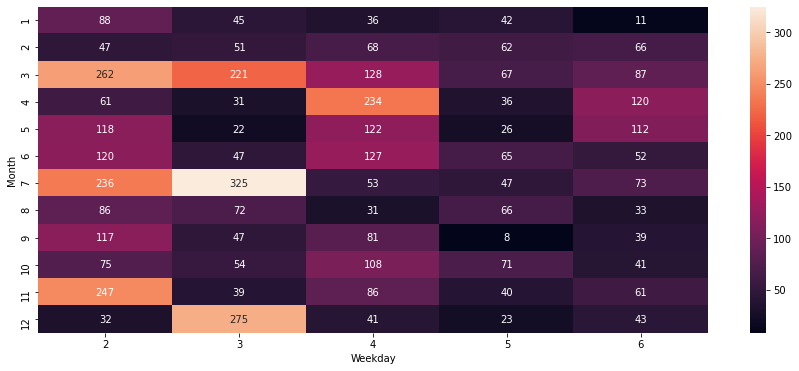

In [124]:
plt.figure(figsize = (15, 6))
sns.heatmap(data.groupby(['Month', 'Weekday'])['AbsH'].sum().unstack()[1:13], 
            annot = True, fmt = 'g') 
plt.show()

## Observation 5
So tuesdays in july have a large number of absenteeism hours when combined

> Could be some public holiday stunt but we have lots to check then. Still worth it ig cos I feel that extending holiday is something lot of people would do

> Idea for April - Holy Week happens in End March - Early April, and the Friday and maybe Thursday is off. So people might do weekedn extension. Again we need to check the reasons they gave

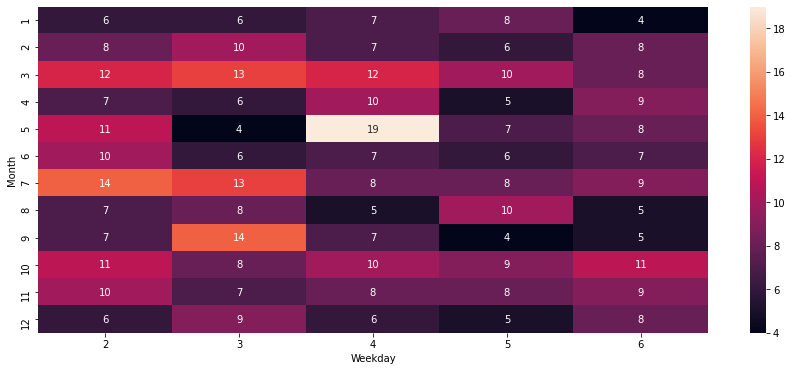

In [125]:
plt.figure(figsize = (15, 6))
sns.heatmap(data.groupby(['Month', 'Weekday'])['ID'].nunique().unstack()[1:13], annot = True, fmt = 'g')
plt.show()

## Observation 6
Most employees are absent on Wednesdays in May, 2nd are Mondays in July and Tuesdays in September.

Those analyses can help the company in two ways:

- Look for whi it was happening in the past
- Keep some intern or some xtra staff during these days so that they don't lost business

In [126]:
reason_df = pd.concat([data.groupby('Reason')['AbsH'].sum(), data.groupby('Reason')['ID'].nunique()], axis=1, sort=False)
reason_df.columns = ['AbsH', 'AbsIDs']

reason_df

,AbsH,AbsIDs
Reason,,
0,0,23
1,182,12
2,24,1
3,8,1
4,9,2
5,19,3
6,171,7
7,150,12
8,32,3


- Reason 13 (musculoskeletal system and connective tissue) causes the most absence hours, and 18 employees are affected. 
> (could be back pain?)
- Reason 19 (Injury, poisoning and certain other consequences of external causes) has the 2nd place, 16 employees are affected
> this is very intriguing - either the food/water quality has issues or Brazil has poor traffic safety/violence
- Reason 23 (medical consultation) causes the 3rd most absence hours and most of the employees (24) are affected.
> Check correlation with Friday/Monday for weekend extension abuse

In [127]:
bins = [20,29,39,49,59] 
labels=['Adult20s','Adult30s','Adult40s','Adult50s']
data['age_fact']=pd.cut(data['Age'],bins=bins,labels=labels)

In [128]:
hours_sum = data.groupby(['ID','age_fact'],as_index=False)['AbsH'].sum()
hours_sum.isnull().sum()

ID            0
age_fact      0
AbsH        107
dtype: int64

In [129]:
hours_sum.dropna(inplace = True)

In [130]:
age_hours_missed=round(hours_sum.groupby(['age_fact'])[['AbsH']].mean(),2)
age_hours_missed

,AbsH
age_fact,
Adult20s,118.17
Adult30s,178.44
Adult40s,88.27
Adult50s,147.25


## Observation 7
People in their 30s and 50s miss out alot on work, whereas the people in their 40s seem to be the ones who are the most regular 

> Young guys are holidaying type, Old peeps have diseases? Check weekedn extension among oldies and youngies
And normalise since there are diff numbers of 20s 30s etc

In [134]:
bin2 = [19,24,29,38]          
labels2 = ['Normal','Overweight','Obese']
data['BMI_fact'] = pd.cut(data['BMI'],bins=bin2,labels=labels2)
BMI_sum = data.groupby(['ID','BMI_fact'],as_index=False)['AbsH'].sum()

BMI_sum.isnull().sum()

ID           0
BMI_fact     0
AbsH        72
dtype: int64

In [135]:
BMI_sum.dropna(inplace = True)

In [137]:
BMI_hours_missed=round(BMI_sum.groupby('BMI_fact')[['AbsH']].mean(),2)
BMI_hours_missed

,AbsH
BMI_fact,
Normal,113.77
Overweight,137.93
Obese,162.33


## Observation 8
Obese people tend to miss out alot on work
Normal people miss almost 40% lesser
> Maybe there are more obese people in the company pushing this number up?

# Extras

Transportation Expense (get total by employee), and versus distance versus leave  
Hit target???

Analysis: 

Reason for absence == 0 => Disciplinary failure == 1

29: After he gave birth to child he became social drinker and had more absences. 
His age increased by 13 years in a span of 3 years. Now he has served 6 more years in the company (in a span of 3 years).
His house gets 11 km closer though his transport expense does not change => he is teleporting.
In fact, his first absence was prolly not reported (reason 0, disco action). 
He becomes 13 cm taller and 25 kg heavier.
Very very fishy indeed.

Rest all columns are nice, remain same over time for each particular ID
Except: Reason, month, day, season, workload, hit target, disciplinary, absenteeism time